<a href="https://colab.research.google.com/github/JuanCVanegas/Practical_Cases/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outline

### Company Name:
Tour & Travels Company

### Problem Type:
Churn Prediction

### Business Problem:

Predict which customers shows the highest risk of churning, reducing customer attrition and fostering long-term customer relationships.

### Business Goal:

 The company aims to implement targeted retention strategies and interventions to optimize customer lifecycle management. The ultimate objective is to improve customer retention rates, maximize customer lifetime value, and enhance overall business performance.

# Import Main Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting seaborn color palette
palette = sns.set_palette('bright')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
data = pd.read_csv('Customertravel.csv')

Mounted at /content/drive


# Exploratory Analysis and Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
data.groupby('Target').describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Target                                                             
0       730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0   
1       224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0   

       ServicesOpted                                               
               count      mean       std  min  25%  50%  75%  max  
Target                                                             
0              730.0  2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1              224.0  2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [ ]:
data['AnnualIncomeClass'].unique()

array(['Middle Income', 'Low Income', 'High Income'], dtype=object)

In [ ]:
data['FrequentFlyer'].unique()

array(['No', 'Yes', 'No Record'], dtype=object)

In [ ]:
# Split the numeric and categorical features
num_features = ['Age']
ordinal_features = ['AnnualIncomeClass', 'ServicesOpted']
cat_features = ['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']

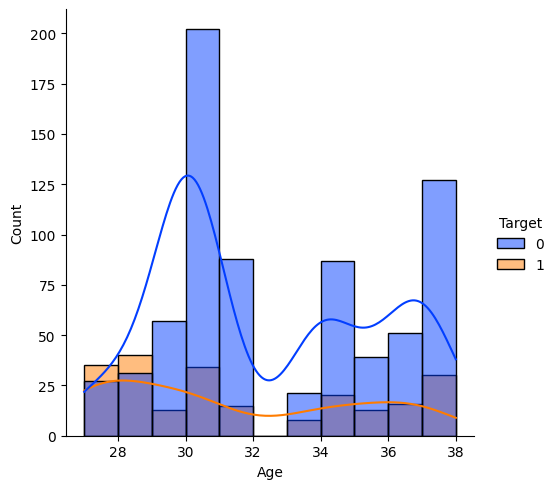

In [ ]:
sns.displot(data=data, x='Age', hue='Target', kde=True )

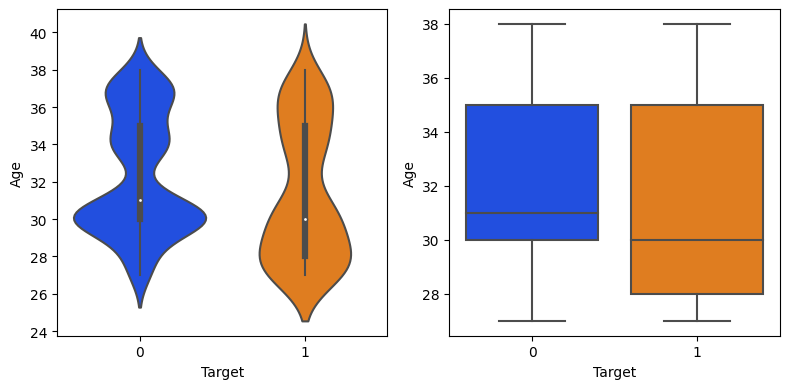

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1 = sns.violinplot(data=data, x='Target', y='Age', ax=ax1)
ax2 = sns.boxplot(data=data, x='Target', y='Age', ax=ax2)
plt.tight_layout()

<Axes: xlabel='Target', ylabel='count'>

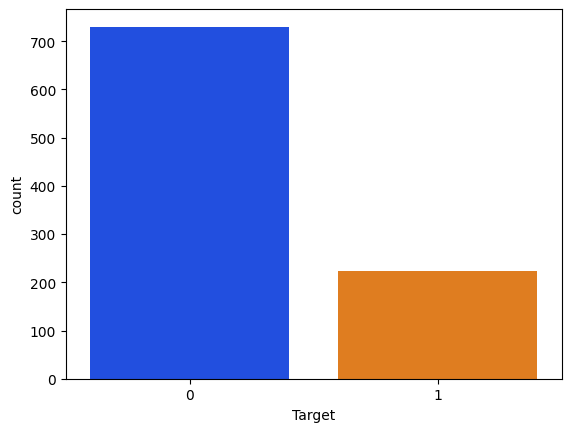

In [ ]:
sns.countplot(data=data, x='Target')

In [ ]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    sns.countplot(x=feature,
                  hue='Target',
                  data=data,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Target',
                data=data,
                ax=ax2)
    ax2.set_ylabel('Churn rate')


    plt.tight_layout()

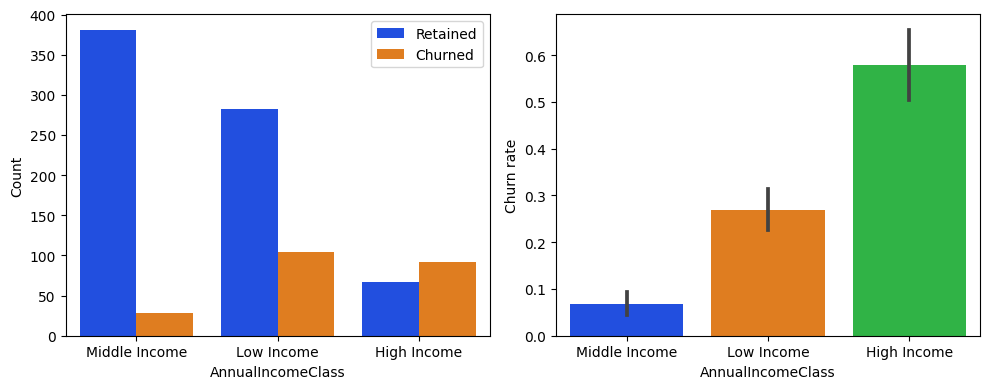

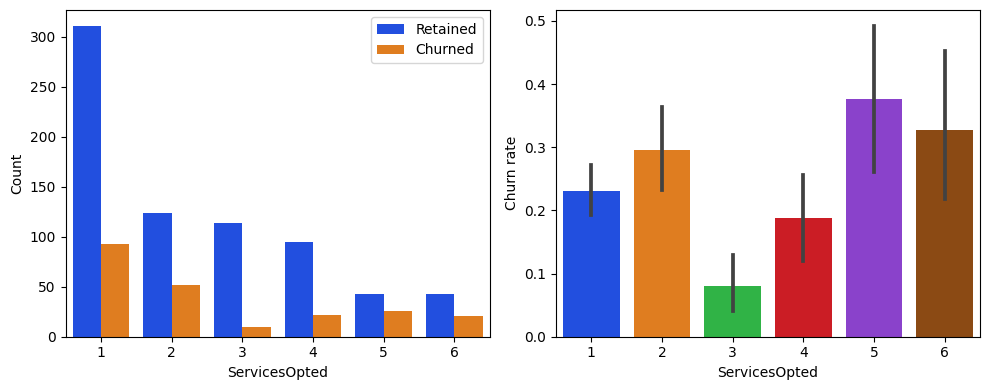

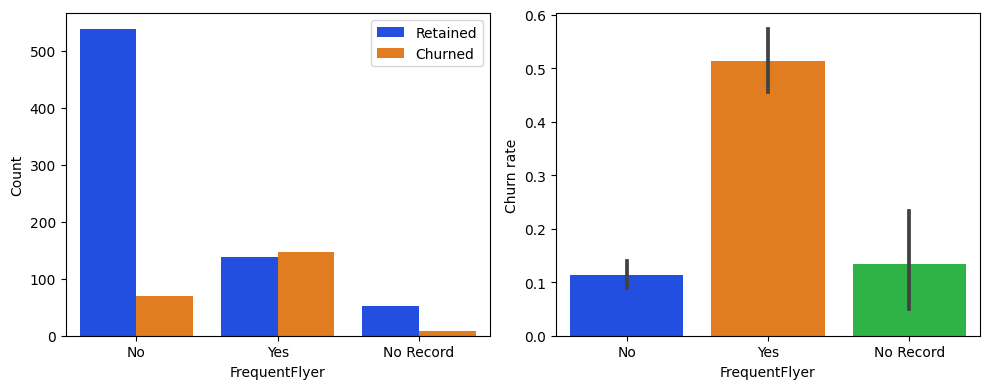

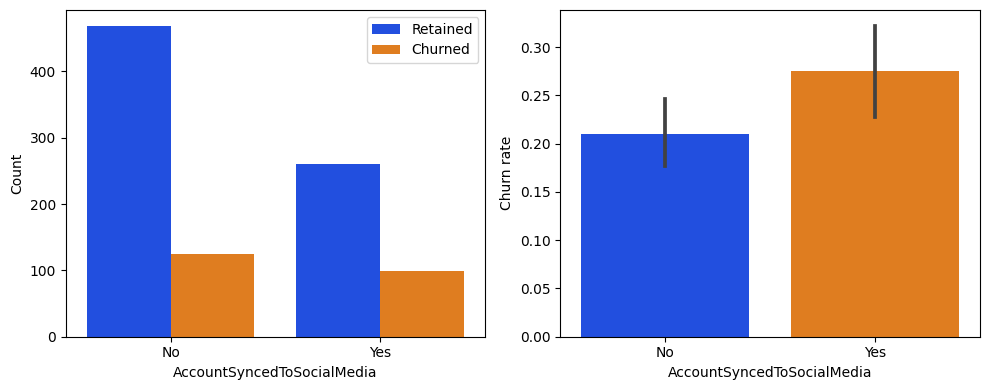

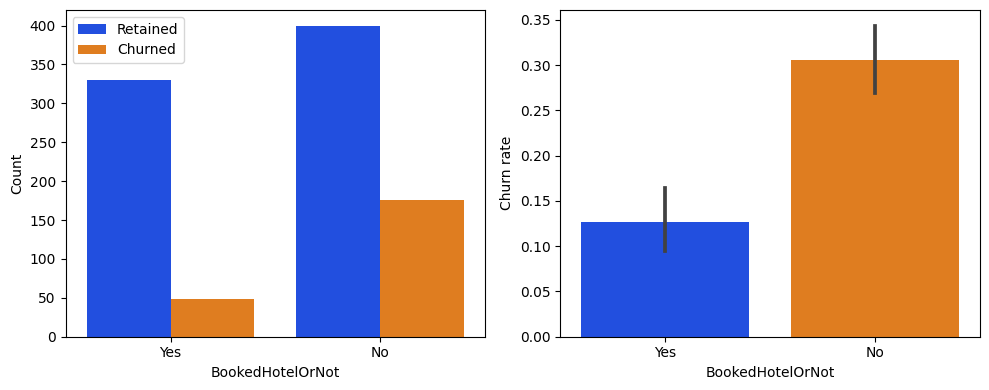

In [ ]:
for feature in (ordinal_features + cat_features[:-1]):
  plot_categorical(feature)

In [ ]:
cleanup_nums = {'FrequentFlyer': {'No': 0, 'Yes': 1,'No Record':3},
                'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2},
                'AccountSyncedToSocialMedia': {'No':0, 'Yes': 1},
                'BookedHotelOrNot': {'No': 0, 'Yes': 1}}

In [ ]:
data = data.replace(cleanup_nums)
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         954 non-null    int64
 1   FrequentFlyer               954 non-null    int64
 2   AnnualIncomeClass           954 non-null    int64
 3   ServicesOpted               954 non-null    int64
 4   AccountSyncedToSocialMedia  954 non-null    int64
 5   BookedHotelOrNot            954 non-null    int64
 6   Target                      954 non-null    int64
dtypes: int64(7)
memory usage: 52.3 KB


<Axes: >

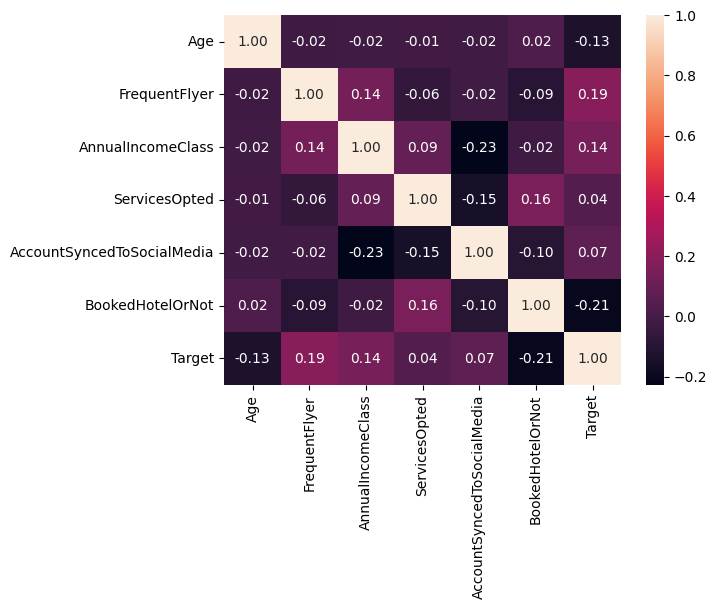

In [ ]:
sns.heatmap(data.corr(),annot=True, fmt='1.2f')

In [ ]:
data.groupby('Target').describe().T

Target                                     0           1
Age                        count  730.000000  224.000000
                           mean    32.352055   31.316964
                           std      3.209323    3.620133
                           min     27.000000   27.000000
                           25%     30.000000   28.000000
                           50%     31.000000   30.000000
                           75%     35.000000   35.000000
                           max     38.000000   38.000000
FrequentFlyer              count  730.000000  224.000000
                           mean     0.404110    0.763393
                           std      0.817997    0.629826
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    1.000000
                           75%      1.000000    1.000000
                           max      3.000000    3.000000
AnnualIncomeClass          count  730.000000  224.000000
                           mean     0.705479    0.946429
                           std      0.626001    0.935971
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      1.000000    1.000000
                           75%      1.000000    2.000000
                           max      2.000000    2.000000
ServicesOpted              count  730.000000  224.000000
                           mean     2.402740    2.549107
                           std      1.554495    1.763430
                           min      1.000000    1.000000
                           25%      1.000000    1.000000
                           50%      2.000000    2.000000
                           75%      3.000000    4.000000
                           max      6.000000    6.000000
AccountSyncedToSocialMedia count  730.000000  224.000000
                           mean     0.357534    0.441964
                           std      0.479603    0.497733
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    0.000000
                           75%      1.000000    1.000000
                           max      1.000000    1.000000
BookedHotelOrNot           count  730.000000  224.000000
                           mean     0.452055    0.214286
                           std      0.498037    0.411245
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    0.000000
                           75%      1.000000    0.000000
                           max      1.000000    1.000000

# Model Training and Evaluation

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 112.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf = setup(data, target = 'Target',session_id = 1)

,Description,Value
0,Session id,1
1,Target,Target
2,Target type,Binary
3,Original data shape,"(954, 7)"
4,Transformed data shape,"(954, 7)"
5,Transformed train set shape,"(667, 7)"
6,Transformed test set shape,"(287, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8711,0.9500,0.7388,0.7280,0.7291,0.6450,0.6481,0.2130
gbc,Gradient Boosting Classifier,0.8696,0.9548,0.7142,0.7424,0.7191,0.6351,0.6417,0.5660
rf,Random Forest Classifier,0.8695,0.9436,0.7067,0.7331,0.7149,0.6310,0.6345,1.1720
dt,Decision Tree Classifier,0.8666,0.8794,0.6762,0.7517,0.7042,0.6192,0.6259,0.1720
et,Extra Trees Classifier,0.8651,0.9096,0.6562,0.7526,0.6935,0.6085,0.6159,0.5960
xgboost,Extreme Gradient Boosting,0.8651,0.9501,0.7008,0.7294,0.7100,0.6227,0.6265,0.1340
knn,K Neighbors Classifier,0.8230,0.8727,0.4958,0.6747,0.5661,0.4591,0.4708,0.1560
qda,Quadratic Discriminant Analysis,0.8170,0.8303,0.5362,0.6545,0.5823,0.4675,0.4759,0.1360
ada,Ada Boost Classifier,0.8111,0.9092,0.4788,0.6261,0.5328,0.4203,0.4311,0.6330
nb,Naive Bayes,0.7974,0.8133,0.3808,0.6261,0.4666,0.3515,0.3718,0.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8657,0.9700,0.6875,0.7333,0.7097,0.6224,0.6230
1,0.8657,0.9375,0.5625,0.8182,0.6667,0.5861,0.6023
2,0.8955,0.9559,0.8750,0.7368,0.8000,0.7300,0.7349
3,0.9403,0.9730,0.8750,0.8750,0.8750,0.8358,0.8358
4,0.8209,0.9295,0.7500,0.6000,0.6667,0.5463,0.5526
5,0.8657,0.9602,0.6875,0.7333,0.7097,0.6224,0.6230
6,0.8507,0.9461,0.7500,0.6667,0.7059,0.6063,0.6082
7,0.8030,0.9033,0.6000,0.5625,0.5806,0.4521,0.4525
8,0.9394,0.9830,0.8667,0.8667,0.8667,0.8275,0.8275


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8955,0.9602,0.8060,0.7606,0.7826,0.7139,0.7144


,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,prediction_label,prediction_score
109,27,1,0,1,1,0,1,1,0.9669
338,30,0,1,3,0,0,0,0,0.9998
28,28,0,0,1,1,0,0,0,0.9780
372,31,0,0,1,1,1,0,0,0.9994
306,36,0,1,1,1,1,0,0,0.9998
...,...,...,...,...,...,...,...,...,...
375,30,3,1,6,0,1,0,0,0.9963
336,35,0,1,1,1,1,0,0,0.9998
400,31,0,0,1,0,1,0,0,1.0000
648,30,0,1,1,0,1,0,0,0.9999
